<a href="https://colab.research.google.com/github/intertech-academy/image_processing_py/blob/main/CPO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obrazy HDR - high dynamic range

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

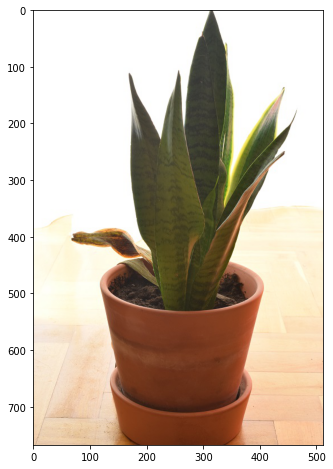

In [3]:
im = np.array(Image.open('t1.JPG'))

plt.figure(figsize=(8,8))
plt.imshow(im)

In [9]:
times = [1, 2.5, 5, 10, 20]

names = [f't{t}'.replace('.', '_')+'.JPG' for t in times]
names

#names = []
#for t in times:
#  name = f't{t}'.replace('.', '_')+'.JPG'
#  names.append(name)
#
#names

['t1.JPG', 't2_5.JPG', 't5.JPG', 't10.JPG', 't20.JPG']

In [10]:
images = [np.array(Image.open(fname)) for fname in names]

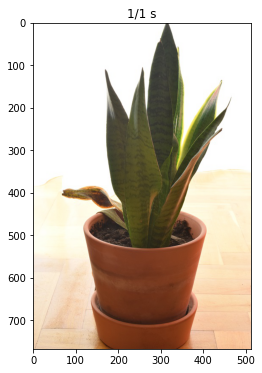

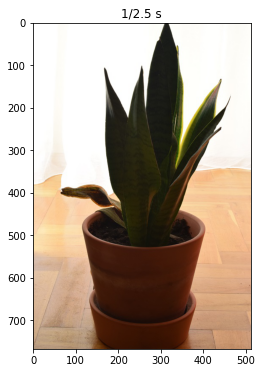

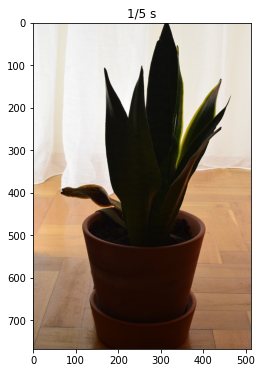

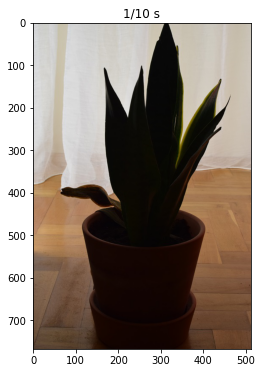

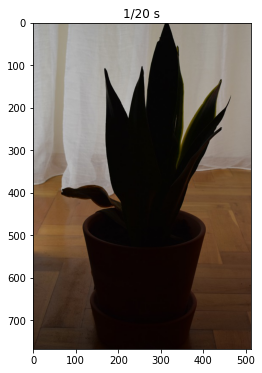

In [16]:
for i, im in enumerate(images):
  plt.figure(figsize=(6,6))
  plt.imshow(im)
  plt.title(f'1/{times[i]} s')

## Histogram

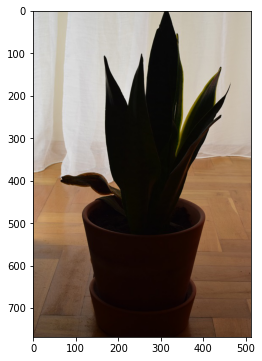

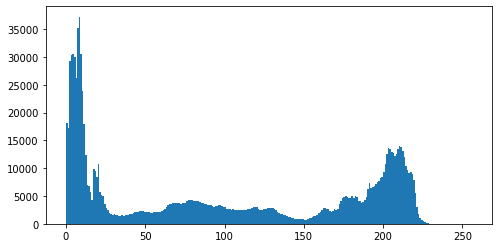

In [24]:
im = images[3]

plt.figure(figsize=(6,6))
plt.imshow(im)

plt.figure(figsize=(8,4))
hist = plt.hist(im.ravel(), 256, [0, 256])

## Generacja obrazu HDR

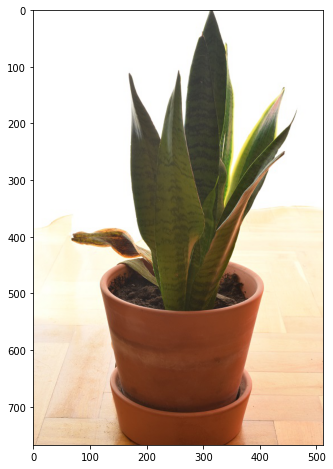

In [28]:
images_f32 = [im/255.0 for im in images]

plt.figure(figsize=(8,8))
plt.imshow(images_f32[0])

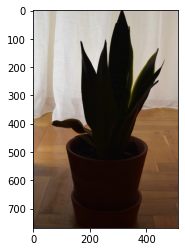

In [31]:
im_hdr = images_f32[0] + images_f32[-1]*times[-1]
im_hdr = (im_hdr - np.min(im_hdr))/(np.max(im_hdr) - np.min(im_hdr))

plt.imshow(im_hdr)

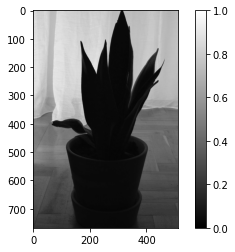

In [37]:
plt.imshow(np.mean(im_hdr, axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 1)

Text(0.5, 1.0, 'org')

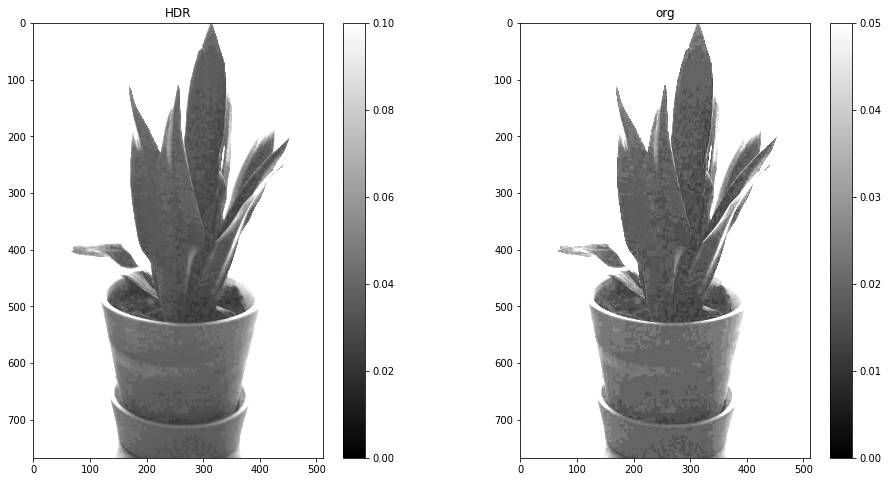

In [43]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
plt.imshow(np.mean(im_hdr, axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 0.1)
plt.title('HDR')

plt.subplot(1,2,2)
plt.imshow(np.mean(images_f32[-1], axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 0.05)
plt.title('org')

## HDR z wszystkich obrazów

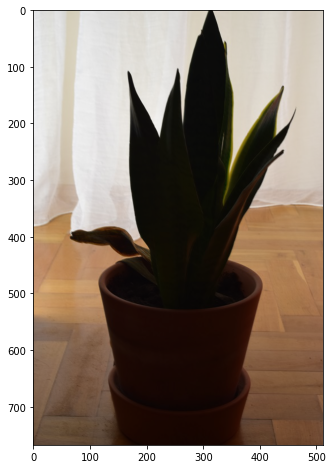

In [46]:
im_hdr = np.zeros(images_f32[0].shape, dtype=np.float32)

for i, im in enumerate(images_f32):
  im_hdr = im_hdr + im*times[i]

im_hdr = (im_hdr - np.min(im_hdr))/(np.max(im_hdr) - np.min(im_hdr))

plt.figure(figsize=(8,8))
plt.imshow(im_hdr)

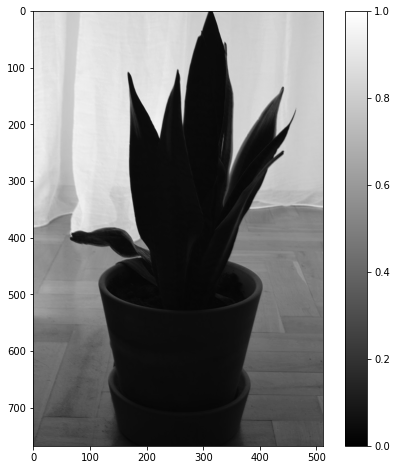

In [56]:
plt.figure(figsize=(8,8))

plt.imshow(np.mean(im_hdr, axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 1)

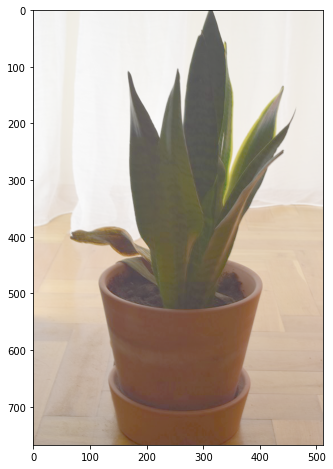

In [62]:
plt.figure(figsize=(8,8))
plt.imshow(im_hdr**0.33)

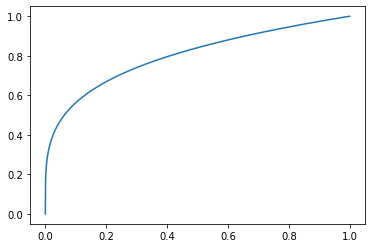

In [61]:
plt.plot(np.linspace(0,1,1000), np.linspace(0,1,1000)**0.25)

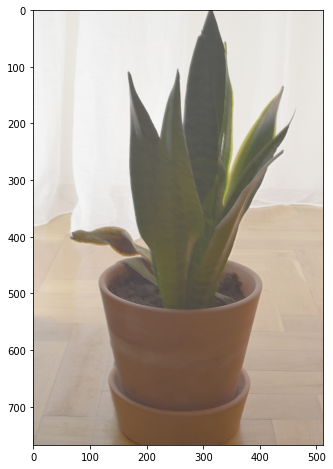

In [66]:
im_hdr = np.zeros(images_f32[0].shape, dtype=np.float32)
w_sum = np.zeros((images_f32[0].shape[0], images_f32[0].shape[1], 1))

for i, im in enumerate(images_f32):
  w = np.expand_dims(np.mean(im, axis=2), axis=2)
  im_hdr = im_hdr + im*w*times[i]
  w_sum = w_sum + w

im_hdr = im_hdr/w_sum

im_hdr = (im_hdr - np.min(im_hdr))/(np.max(im_hdr) - np.min(im_hdr))

plt.figure(figsize=(8,8))
plt.imshow(im_hdr**0.33)